# IIC-3641 GML UC

- Versiones de librerías, python 3.10.2

- networkx 2.6.2

## Vamos a crear una red usando el modelo Barabási-Albert

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 10000
m = 3

G = nx.barabasi_albert_graph(N, m, seed=None, initial_graph=None)
node_degrees = dict(G.degree())
degrees = np.array(list(node_degrees.values()))
min_degree = degrees.min()
max_degree = degrees.max()

normalized_degrees = (degrees - min_degree) / (max_degree - min_degree)


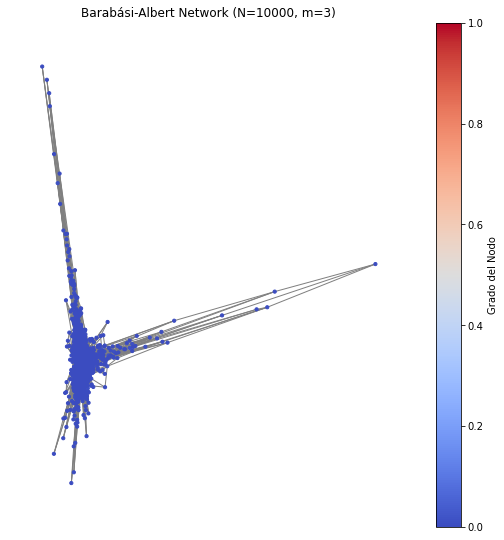

In [2]:
colors = plt.cm.coolwarm(normalized_degrees)

pos = nx.spectral_layout(G)  # Posiciones de los nodos

plt.figure(figsize=(7, 7))
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.coolwarm, edge_color='gray')
plt.title("Barabási-Albert Network (N=10000, m=3)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.coolwarm), label="Grado del Nodo")
plt.show()

## Obtenemos la distribución de grado

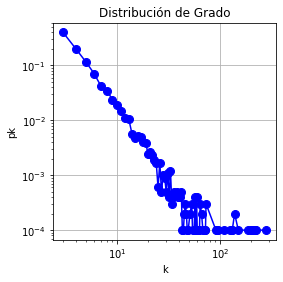

In [3]:
degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degrees = sorted(degree_counts.items())

x, y = zip(*sorted_degrees)
p = [n / N for n in y]


plt.figure(figsize=(4, 4))
plt.plot(x, p, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Grado')
plt.xlabel('k')
plt.ylabel('pk')

plt.grid(True)
plt.show()

# Ajustamos una power law

In [5]:
from scipy import stats

log_k = np.log(range(1, len(x) + 1))
log_pk = np.log(p)

slope, intercept, r_value, p_value, std_err = stats.linregress(log_k, log_pk)

gamma = -slope
print(f'El exponente de la ley de potencias (γ) es aproximadamente: {gamma:.4f}')


El exponente de la ley de potencias (γ) es aproximadamente: 2.2544


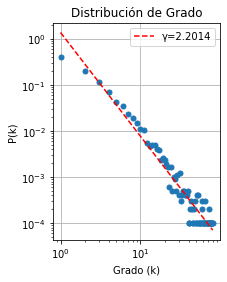

In [6]:
# Graficar la distribución de grado en una escala log-log
plt.figure(figsize=(3, 4))
plt.loglog(range(1, len(x) + 1), p, 'o', markersize=5)
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.title('Distribución de Grado')

# Graficar la línea ajustada
plt.plot(np.exp(log_k), np.exp(intercept + slope * log_k), color='red', linestyle='--', label='γ=2.2014')
plt.legend()
plt.grid(True)
plt.show()

## Podemos calcular el coeficiente de determinación

In [7]:
# Coeficiente de determinación (R²), si es cercano a 1 tenemos un buen ajuste
r_squared = r_value**2
print(f"R²: {r_squared}")

R²: 0.9487352577579412


## Observe que el grado promedio es ~ 2m ¿Por qué?

In [8]:
sum(degrees)/N

5.9982